<!-- Part A Heading -->
## Part A: Setting the Layout (Fruchterman-Reingold)


<!-- Part A1 Heading -->
### Part A1: Baseline Layout


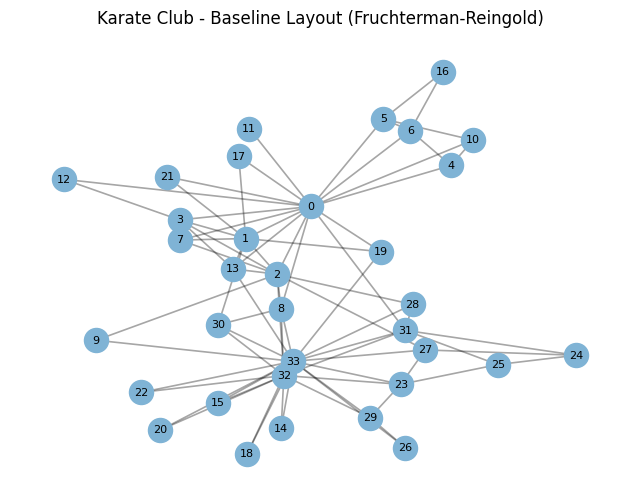

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42, k=0.3, iterations=100)

fig, ax = plt.subplots(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="#7FB3D5", ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.35, width=1.2, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
ax.set_title("Karate Club - Baseline Layout (Fruchterman-Reingold)")
ax.axis("off")
plt.show()


<!-- Part A Story Heading -->
### Part A Storytelling
From this layout I can already see two loose groups.
Node 0 sits near the top center with many links, so it feels like the main hub, while node 33 anchors the cluster lower down.
Most other nodes gather around either 0 or 33, so any tension would likely revolve around these two centers.


<!-- Part B Heading -->
## Part B: Identifying the Antagonists (Centrality Analysis)


<!-- Part B1 Heading -->
### Part B1: Centrality Metrics and Visualization


In [2]:

from matplotlib import cm

# Degree and betweenness centrality
deg_c = nx.degree_centrality(G)
bet_c = nx.betweenness_centrality(G)

# Top 3 nodes for each metric
Top3_degree = sorted(deg_c.items(), key=lambda x: x[1], reverse=True)[:3]
Top3_betweenness = sorted(bet_c.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 Degree Centrality:")
for n, s in Top3_degree:
    print(f"  Node {n}: {s:.3f}")
print("Top 3 Betweenness Centrality:")


Top 3 Degree Centrality:
  Node 33: 0.515
  Node 0: 0.485
  Node 32: 0.364
Top 3 Betweenness Centrality:


  Node 0: 0.438
  Node 33: 0.304
  Node 32: 0.145


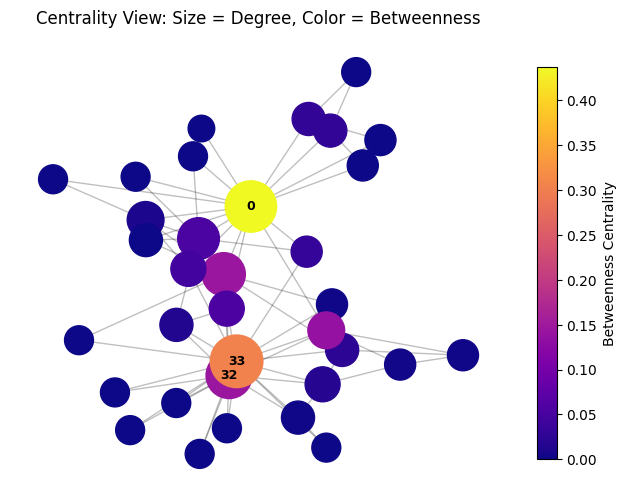

In [3]:
for n, s in Top3_betweenness:
    print(f"  Node {n}: {s:.3f}")

# Visual mapping
node_sizes = [300 + deg_c[n] * 2200 for n in G.nodes()]
color_map = cm.plasma
node_colors = [bet_c[n] for n in G.nodes()]

# Label only top betweenness nodes
labels = {n: str(n) for n, _ in Top3_betweenness}

fig, ax = plt.subplots(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=color_map,
    ax=ax,
)
nx.draw_networkx_edges(G, pos, alpha=0.25, width=1.0, ax=ax)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight="bold", ax=ax)
cbar = fig.colorbar(nodes, ax=ax, shrink=0.85)
cbar.set_label("Betweenness Centrality")
ax.set_title("Centrality View: Size = Degree, Color = Betweenness")
ax.axis("off")
plt.show()


<!-- Part B2 Heading -->
### Part B2: Storytelling Helpers


In [4]:

# Quick narrative helpers for Part B

# Two most prominent by both metrics (intersection of top lists)
top_deg_nodes = [n for n, _ in Top3_degree]
top_bet_nodes = [n for n, _ in Top3_betweenness]
common_prominent = [n for n in top_deg_nodes if n in top_bet_nodes]
print("Prominent in both degree and betweenness:", common_prominent)

# Relative distance between the two leaders
lead_pair = (0, 33)
pair_dist = ((pos[lead_pair[0]][0] - pos[lead_pair[1]][0]) ** 2 + (pos[lead_pair[0]][1] - pos[lead_pair[1]][1]) ** 2) ** 0.5
print(f"Distance between Node {lead_pair[0]} and Node {lead_pair[1]} in layout: {pair_dist:.3f}")

# Identify a high-degree but low-betweenness node
sorted_deg = sorted(G.nodes(), key=lambda n: deg_c[n], reverse=True)
candidate = None
for n in sorted_deg:
    if n not in common_prominent:
        candidate = n
        break
print(
    f"Example of high degree but lower betweenness: Node {candidate} (degree={deg_c[candidate]:.3f}, betweenness={bet_c[candidate]:.3f})"
)


Prominent in both degree and betweenness: [33, 0, 32]
Distance between Node 0 and Node 33 in layout: 0.723
Example of high degree but lower betweenness: Node 2 (degree=0.303, betweenness=0.144)


<!-- Part B Story Heading -->
### Storytelling for Part B
Node 0 pops out bright yellow and the biggest, so it clearly sits in the middle of conversations.
Node 33 is the next hot color and large size, anchoring the lower group and acting as the other key broker.
Node 32 is big but cooler, meaning it is popular in its cluster but not the main bridge across the club.
The two leaders 0 and 33 are not on top of each other; their gap hints at two camps forming around them.


<!-- Part C Heading -->
## Part C: Predicting the Schism (Community Detection)


<!-- Part C1 Heading -->
### Part C1: Girvan-Newman Communities


Community 1 members: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 2 members: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


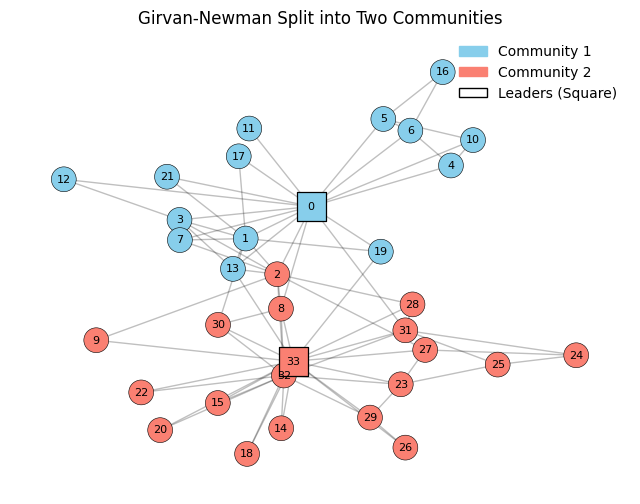

In [5]:

from networkx.algorithms.community import girvan_newman
import matplotlib.patches as mpatches

# Girvan-Newman first split into two communities
communities_gen = girvan_newman(G)
comm_level = next(communities_gen)
communities = [set(c) for c in comm_level]
print("Community 1 members:", sorted(communities[0]))
print("Community 2 members:", sorted(communities[1]))

# Map nodes to community index for coloring
comm_map = {}
for idx, comm in enumerate(communities):
    for node in comm:
        comm_map[node] = idx
colors = ["skyblue", "salmon"]
node_colors_c = [colors[comm_map[n]] for n in G.nodes()]

fig, ax = plt.subplots(figsize=(8, 6))
# Draw general members as circles
non_leaders = [n for n in G.nodes() if n not in (0, 33)]
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=non_leaders,
    node_size=320,
    node_color=[node_colors_c[n] for n in non_leaders],
    node_shape="o",
    edgecolors="black",
    linewidths=0.4,
    ax=ax,
)
# Draw leaders as squares
leaders = [0, 33]
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=leaders,
    node_size=440,
    node_color=[node_colors_c[n] for n in leaders],
    node_shape="s",
    edgecolors="black",
    linewidths=0.9,
    ax=ax,
)

nx.draw_networkx_edges(G, pos, alpha=0.25, width=1.0, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

legend_handles = [
    mpatches.Patch(color=colors[0], label="Community 1"),
    mpatches.Patch(color=colors[1], label="Community 2"),
    mpatches.Patch(facecolor="white", edgecolor="black", label="Leaders (Square)"),
]
ax.legend(handles=legend_handles, frameon=False, loc="upper right")
ax.set_title("Girvan-Newman Split into Two Communities")
ax.axis("off")
plt.show()


<!-- Part C2 Heading -->
### Part C2: Boundary Analysis


In [6]:

# Boundary analysis: count edges that cross communities
inter_edges = [e for e in G.edges() if comm_map[e[0]] != comm_map[e[1]]]
intra_edges = [e for e in G.edges() if comm_map[e[0]] == comm_map[e[1]]]
print(f"Cross-community edges: {len(inter_edges)}")
print(f"Within-community edges: {len(intra_edges)}")
print(f"Fraction of edges crossing communities: {len(inter_edges)/G.number_of_edges():.3f}")


Cross-community edges: 10
Within-community edges: 68
Fraction of edges crossing communities: 0.128


<!-- Part C Story Heading -->
### Storytelling for Part C
The algorithm split the club into two clear colors: light blue around leader 0 and salmon around leader 33.
Only a few gray edges (about 13%) cross the color boundary, so the two sides were already loosely connected.
This matches the historical split: 0’s followers versus 33’s side, with just a small bridge of links holding them together.
A couple of nodes sit near the middle of the boundary, but most stick to their side, hinting the break was likely.
